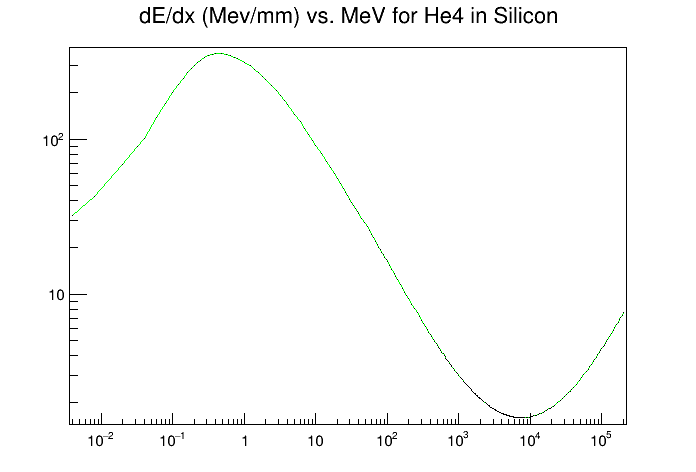

In [1]:
%jsroot on //读取4He在Si中的能损信息
ifstream in_he4("He4elossinSi.txt");
string ss_he4;
double a_he4, b_he4, e_he4, dedx_he4;
auto *g_he4 = new TGraph;
TCanvas c_he4;
if(!in_he4.is_open())
{
    cout<<"Data File about He4 does noet exist!"<<endl;
    return 0;
}
getline(in_he4,ss_he4);
int i_he4=0;
while(!in_he4.eof())
{
    in_he4>>a_he4>>b_he4>>e_he4>>dedx_he4>>a_he4>>b_he4>>a_he4>>b_he4>>a_he4>>b_he4>>a_he4>>b_he4;
    g_he4->SetPoint(i_he4,e_he4*4,dedx_he4*1000);//number,MeV,MeV/mm
    i_he4++;
}
g_he4->SetTitle("dE/dx (Mev/mm) vs. MeV for He4 in Silicon");
g_he4->SetLineColor(kGreen);
g_he4->Draw();
gPad->SetLogy();
gPad->SetLogx();
c_he4.Draw();
in_he4.close();

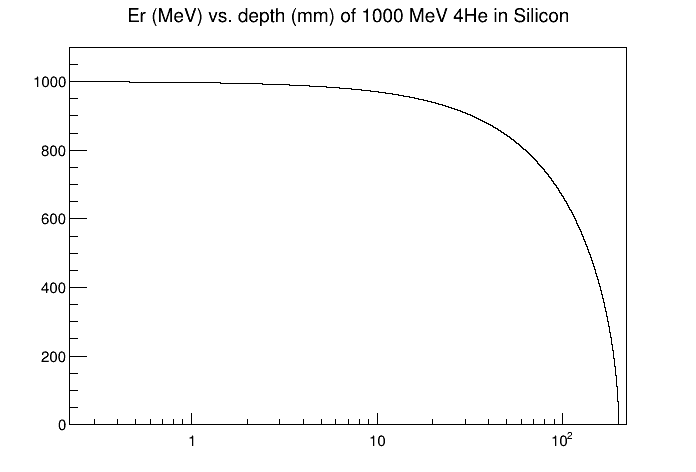

depth:200.532 mm


In [2]:
//%jsroot on;//本行代码1000 MeV的4He粒子在Si不同厚度时的剩余能量(e=f(x)）以及不同剩余能量对应的穿透厚度(x=f(e)）；
Double_t er_he4 = 1000.;//MeV：1000 MeV 4he；
Double_t dx_he4 = 0.001;//mm：穿透每个切片的厚度；
Double_t x_he4=0.0;//mm：穿透总厚度
auto * d2e_he4 = new TGraph;//depth to Er (Er vs depth);
auto * e2d_he4 = new TGraph;//Er to depth (depth vs Er);
TCanvas c_d2e_he4;
Int_t j_he4 =0;
while(er_he4>0)
{
    d2e_he4->SetPoint(j_he4,x_he4,er_he4);//写入穿透该切片前位置与dedx(Er vs depth)
    e2d_he4->SetPoint(j_he4,er_he4,x_he4);//写入穿透该切片前位置与dedx(depth vs Er)
    j_he4++;//下一切片；
    x_he4=j_he4*dx_he4;//穿透该切片后位置；
    er_he4=er_he4-dx_he4*g_he4->Eval(er_he4);//穿透切片后剩余能量；
}
d2e_he4->SetPoint(j_he4,x_he4,0);//写入4He能量全部沉积后的位置与er；
e2d_he4->SetPoint(j_he4,0,x_he4);//写入4He能量全部沉积后的位置与er；
d2e_he4->SetTitle("Er (MeV) vs. depth (mm) of 1000 MeV 4He in Silicon");
d2e_he4->SetLineColor(kRed);
d2e_he4->Draw();
//gPad->SetLogy();
gPad->SetLogx();
c_d2e_he4.Draw();
cout<<"depth:"<<x_he4<<" mm"<<endl;

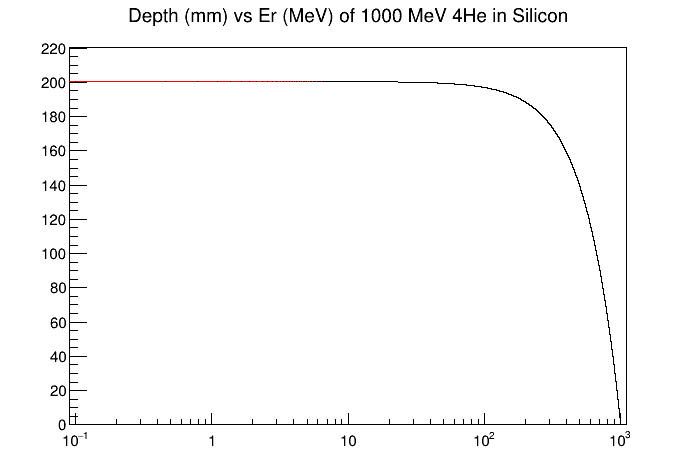

Depth of 1000 MeV 4He in Sillicon:200.532 mm
Depth of 5.486 MeV 4He in Sillicon:0.0277423 mm
Depth of 10 MeV 4He in Sillicon:0.0692679 mm
Depth of 100 MeV 4He in Sillicon:3.48517 mm
Depth of 200 MeV 4He in Sillicon:12.0104 mm


In [3]:
//%jsroot on
TCanvas c_e2d_he4;
e2d_he4->SetTitle("Depth (mm) vs Er (MeV) of 1000 MeV 4He in Silicon");
e2d_he4->SetLineColor(kRed);
e2d_he4->Draw();
//gPad->SetLogy();
gPad->SetLogx();
c_e2d_he4.Draw();
cout<<"Depth of 1000 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)<<" mm"<<endl;
cout<<"Depth of 5.486 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(5.486)<<" mm"<<endl;
cout<<"Depth of 10 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(10)<<" mm"<<endl;
cout<<"Depth of 100 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(100)<<" mm"<<endl;
cout<<"Depth of 200 MeV 4He in Sillicon:"<<e2d_he4->Eval(0)-e2d_he4->Eval(200)<<" mm"<<endl;

In [4]:
//%jsroot on
//the energy loss of 10 MeV 4He in 1000 um silicon;
/*
Double_t e_he4_10 = 10.;//MeV;
Double_t thickness = 1.;//mm;
Double_t x_depth;
Double_t de;

x_depth=e2d_he4->Eval(e_he4_10);
x_depth=x_depth+thickness;
de=e_he4_10-d2e_he4->Eval(x_depth);
if(de<e_he4_10) 
{
  de=de;  
}
else
{
    de=e_he4_10;
}
cout<<"The energy loss of "<<e_he4_10<<" MeV 4He in "<<thickness*1000<<" um is "<<de<<" Mev."<<endl;
*/

In [5]:
//%jsroot on
//the energy loss of 10 MeV 4He in 1000, 500,1000 um silicon;
/*
Double_t e_he4_10 =10.;//MeV;
Double_t thickness[3] ={ 1.,0.5,1.};//mm;
Double_t x_depth;
Double_t de;

for(Int_t thicknessi=0;thicknessi<3;thicknessi++)
{
x_depth=e2d_he4->Eval(e_he4_10);
x_depth=x_depth+thickness[thicknessi];
de=e_he4_10-d2e_he4->Eval(x_depth);
    if(de<e_he4_10) 
    {
      de=de;  
    }
    else
    {
    de=e_he4_10;
    }
cout<<"The energy loss of "<<e_he4_10<<" MeV 4He in "<<thickness[thicknessi]*1000<<" um is "<<de<<" Mev."<<endl;
e_he4_10=e_he4_10-de;
cout<<"The energy residue of 10 MeV 4He in "<<thickness[thicknessi]*1000<<" um is "<<e_he4_10<<" Mev."<<endl;
}
*/

In [6]:
//%jsroot on
//the energy loss of 10 MeV 4He in 1000, 500,1000 um silicon;

Double_t e_he4_x[3] ={10.,100.,200.};//MeV;
Double_t thickness[3] ={ 1.,0.5,1.};//mm;
Double_t x_depth;
Double_t de;
for(Int_t ei=0;ei<3;ei++)
{
    for(Int_t thicknessi=0;thicknessi<3;thicknessi++)
    {
    x_depth=e2d_he4->Eval(e_he4_x[ei]);
    x_depth=x_depth+thickness[thicknessi];
    de=e_he4_x[ei]-d2e_he4->Eval(x_depth);
        if(de<e_he4_x[ei]) 
        {
          de=de;  
        }
        else
        {
        de=e_he4_x[ei];
        }
    cout<<"The energy loss of "<<e_he4_x[ei]<<" MeV 4He in "<<thickness[thicknessi]*1000<<" um is "<<de<<" Mev."<<endl;
    e_he4_x[ei]=e_he4_x[ei]-de;
    //cout<<"The energy residue of 10 MeV 4He in "<<thickness[thicknessi]*1000<<" um is "<<e_he4_10<<" Mev."<<endl;
    } 
cout<<""<<endl;
}


The energy loss of 10 MeV 4He in 1000 um is 10 Mev.
The energy loss of 0 MeV 4He in 500 um is 0 Mev.
The energy loss of 0 MeV 4He in 1000 um is 0 Mev.

The energy loss of 100 MeV 4He in 1000 um is 17.3812 Mev.
The energy loss of 82.6188 MeV 4He in 500 um is 9.8863 Mev.
The energy loss of 72.7325 MeV 4He in 1000 um is 24.0471 Mev.

The energy loss of 200 MeV 4He in 1000 um is 9.48408 Mev.
The energy loss of 190.516 MeV 4He in 500 um is 4.88291 Mev.
The energy loss of 185.633 MeV 4He in 1000 um is 10.0875 Mev.



In [7]:
!jupyter nbconvert 3.he4elossindect.ipynb --to html

[NbConvertApp] Converting notebook 3.he4elossindect.ipynb to html


